In [12]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better plot visuals
sns.set(style="whitegrid")
%matplotlib inline

# Load the dataset
df = pd.read_csv("train.csv")

# View first 5 rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# Check dataset structure and missing values
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)  # Too many missing values

# Convert data types (if needed)
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')

# Rename columns for clarity (optional)
df.rename(columns={
    'SibSp': 'Siblings/Spouses',
    'Parch': 'Parents/Children'
}, inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_8868\3993337772.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8868\3993337772.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [15]:
# Replace missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Replace missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [16]:
# Numerical summaries
print("Summary Statistics:")
display(df[['Age', 'Fare']].describe())

print("Median Age:", df['Age'].median())
print("Mode of Fare:", df['Fare'].mode()[0])


Summary Statistics:


,Age,Fare
count,891.000000,891.000000
mean,29.361582,32.204208
std,13.019697,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,28.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


Median Age: 28.0
Mode of Fare: 8.05


In [17]:
# Frequency of categorical variables
print("\nPclass Distribution:")
print(df['Pclass'].value_counts())

print("\nSex Distribution:")
print(df['Sex'].value_counts())

print("\nEmbarked Distribution:")
print(df['Embarked'].value_counts())



Pclass Distribution:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Sex Distribution:
Sex
male      577
female    314
Name: count, dtype: int64

Embarked Distribution:
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


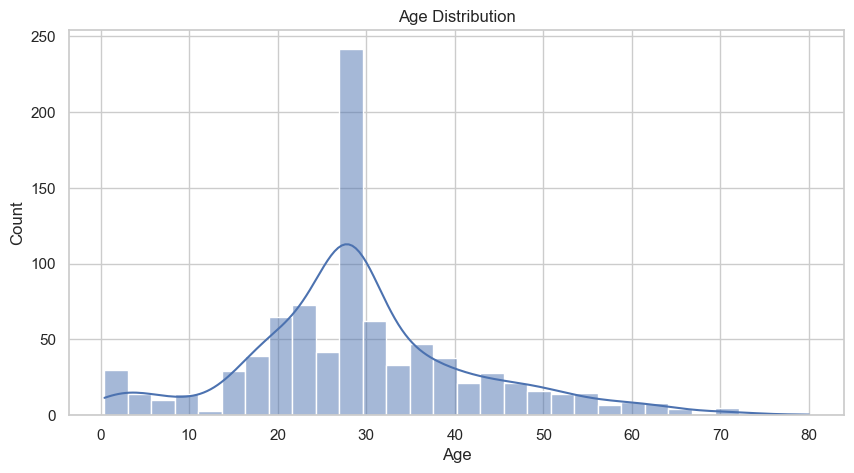

In [18]:
# Age distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


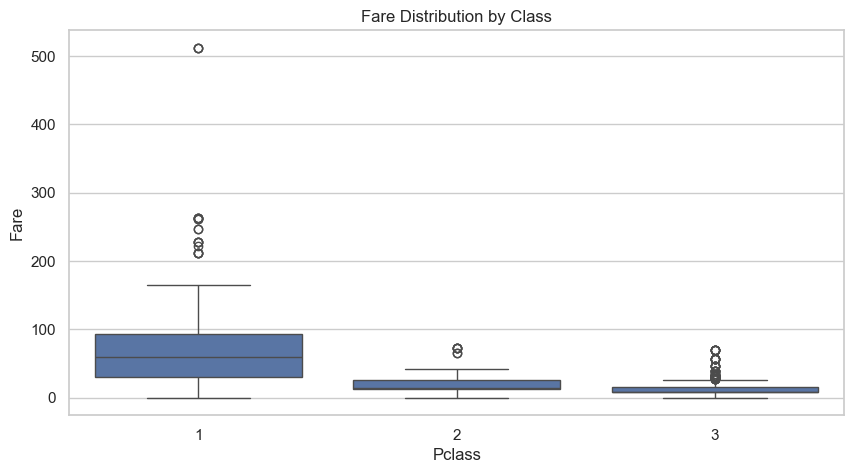

In [19]:
# Fare distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare Distribution by Class")
plt.show()


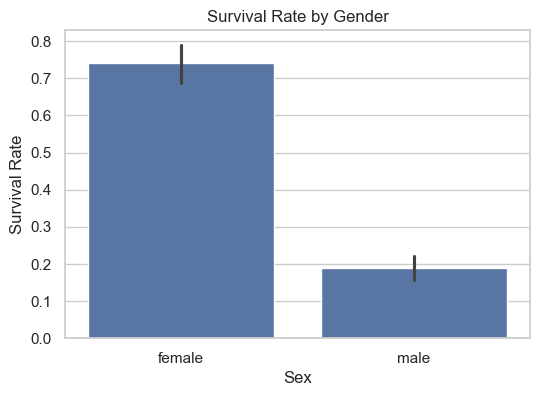

In [20]:
# Survival by Sex
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()


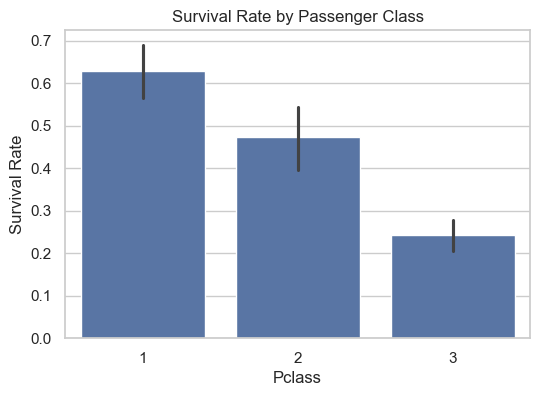

In [21]:
# Survival by Class
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.show()


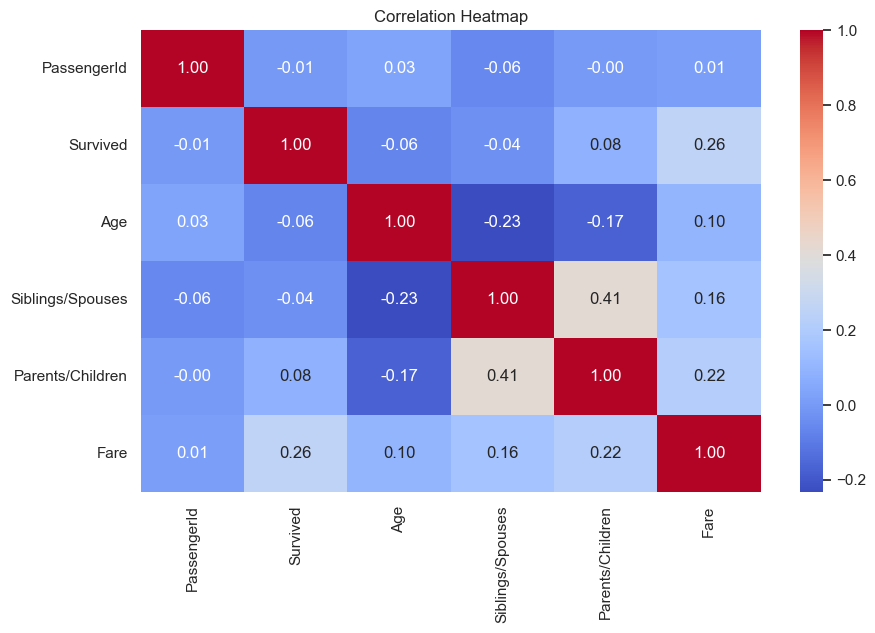

In [22]:
# Correlation matrix (numeric only)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [23]:
# Survival rate by gender
gender_survival = df.groupby('Sex')['Survived'].mean()
print("Survival Rate by Gender:")
print(gender_survival)


C:\Users\Admin\AppData\Local\Temp\ipykernel_8868\3592293422.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_survival = df.groupby('Sex')['Survived'].mean()


Survival Rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [24]:
# Survival rate by class
class_survival = df.groupby('Pclass')['Survived'].mean()
print("\nSurvival Rate by Class:")
print(class_survival)



Survival Rate by Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_8868\1039291479.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_survival = df.groupby('Pclass')['Survived'].mean()


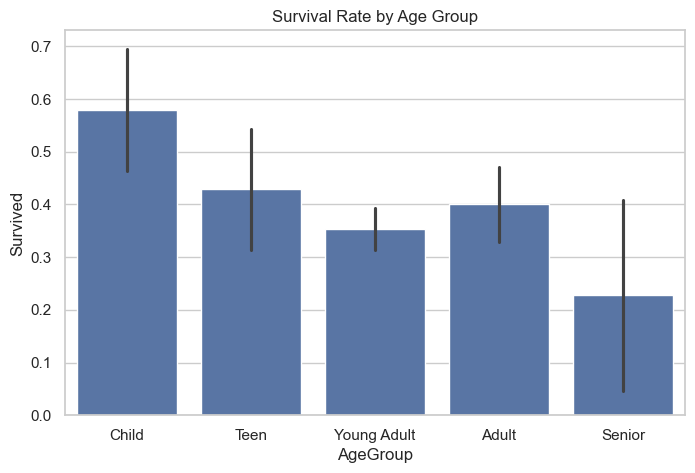

In [25]:
# Create age bins
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], 
                        labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# Plot survival rate by age group
plt.figure(figsize=(8, 5))
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title("Survival Rate by Age Group")
plt.show()
